In [1]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc


#plots
import pylab as plt
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


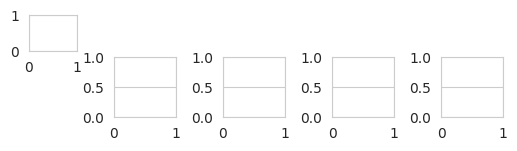

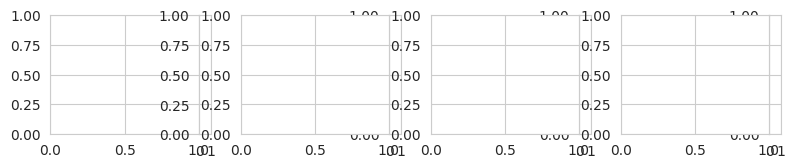

In [2]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../svgs/S1.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout
# path="/home/vbl/DataAnalysis/data/simulator/figure/Figure_tracking/"
layout = load()

In [4]:
fdf=pd.read_hdf("../data/algorithm/whiff.h5")
x_bins = np.arange(0, 51, 5)
y_bins = np.arange(-15, 16, 5)

Concentration

In [5]:
ax=layout.axes[('fig1','ax1')]
ax.scatter(fdf.avg_distance_along_streakline,fdf.avg_nearest_from_streakline, c=fdf.length_of_encounter, 
           cmap='inferno_r',s=2, vmin=0,vmax=0.1, rasterized=True)

ax.set_rasterization_zorder(-20)

for x in x_bins:
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.1,alpha=1, rasterized=True)
for y in y_bins:
    ax.axhline(y=y, color='black', linestyle='--', linewidth=0.1, alpha=1, rasterized=True)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,-10,15],
                           xticks=[0,5,50],
                           linewidth=0.5)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.1, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')


In [6]:
ax = layout.axes[('fig1', 'c1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='inferno_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("WD,s",labelpad=-20)

ax.set_yticklabels(['0', '0.1'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

Concentration

In [7]:
ax=layout.axes[('fig1','ax2')]
ax.scatter(fdf.avg_distance_along_streakline,fdf.avg_nearest_from_streakline, c=fdf.mean_concentration, 
           cmap='inferno_r',s=2, vmin=0,vmax=10, rasterized=True)

ax.set_rasterization_zorder(-20)

for x in x_bins:
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.1,alpha=1, rasterized=True)
for y in y_bins:
    ax.axhline(y=y, color='black', linestyle='--', linewidth=0.1, alpha=1, rasterized=True)

ax.grid(False)
mpl_functions.adjust_spines(ax,['bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,-10,15],
                           xticks=[0,5,50],
                           linewidth=0.5)
ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.05, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [8]:
ax = layout.axes[('fig1', 'c2')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='inferno_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("WC,a.u.",labelpad=-20)

ax.set_yticklabels(['0', '10'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

Std Dev

In [9]:
ax=layout.axes[('fig1','ax3')]
ax.scatter(fdf.avg_distance_along_streakline,fdf.avg_nearest_from_streakline, c=fdf.std_whiff, 
           cmap='inferno_r',s=2, vmin=0,vmax=2, rasterized=True)

ax.set_rasterization_zorder(-20)

for x in x_bins:
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.1,alpha=1, rasterized=True)
for y in y_bins:
    ax.axhline(y=y, color='black', linestyle='--', linewidth=0.1, alpha=1, rasterized=True)

ax.grid(False)
mpl_functions.adjust_spines(ax,['bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,-10,15],
                           xticks=[0,5,50],
                           linewidth=0.5)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.05, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [10]:
ax = layout.axes[('fig1', 'c3')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='inferno_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("WSD,a.u.",labelpad=-20)

ax.set_yticklabels(['0', '2'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

Intermittency

In [11]:
ax=layout.axes[('fig1','ax4')]
ax.scatter(fdf.avg_distance_along_streakline,fdf.avg_nearest_from_streakline, c=fdf.odor_intermittency, 
           cmap='inferno_r',s=2, vmin=0,vmax=2, rasterized=True)

ax.set_rasterization_zorder(-20)

for x in x_bins:
    ax.axvline(x=x, color='black', linestyle='--', linewidth=0.1,alpha=1, rasterized=True)
for y in y_bins:
    ax.axhline(y=y, color='black', linestyle='--', linewidth=0.1, alpha=1, rasterized=True)

ax.grid(False)
mpl_functions.adjust_spines(ax,['bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-15,-10,15],
                           xticks=[0,5,50],
                           linewidth=0.5)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.05, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [12]:
ax = layout.axes[('fig1', 'c4')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='inferno_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("WI,s",labelpad=-20)

ax.set_yticklabels(['0', '2'])
ax.tick_params(axis='y', pad=1) 

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

### AR Updates

In [14]:
df_test =pd.read_hdf("../data/algorithm/intermediates.h5") 

In [15]:
df_test['whiff_duration_signal'] = 0
index = osc.get_index(df_test.predicted_odor,4.5)
# 3. Set each index in the groups to 1
for group in index:
    df_test.iloc[group, df_test.columns.get_loc('whiff_duration_signal')] = 1

In [16]:
xlimTs=[332.3,332.8]
plot_lim_1=66507
plot_lim_2=66585

color_lim_1=66582
color_lim_2=66585

ax=layout.axes[('fig2','axbinary')]
ax.plot(df_test.time[plot_lim_1:66594], df_test.whiff_duration_signal[plot_lim_1:66594], linewidth=0.5, c='black', rasterized=True)
# ax.plot(df_test.time[color_lim_1:66594], df_test.whiff_duration_signal[color_lim_1:66594], linewidth=0.5, c='r', rasterized=True)
# ax.axhline(4.5, color='r', linestyle='--', linewidth= 0.5, rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
# ax.set_xlabel('1 s')

ax.set_xlabel('0.5 s')
ax.xaxis.set_label_coords(0.5, -0.3)
# ax.set_ylabel('odor, a.u.')
ax.yaxis.set_label_coords(-0.12, 0.5)

ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=xlimTs,
                           linewidth=0.5)
ax.set_yticklabels(['0','1'])
figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [17]:
xlimTs=[332.3,332.8]

ax=layout.axes[('fig2','axtarget')]
ax.plot(df_test.time, df_test.target_concentration, linewidth=0.5, c='black', rasterized=True)
ax.axhline(4.5, color='r', linestyle='--', linewidth= 0.5, rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
# ax.set_xlabel('1 s')

ax.set_xlabel('0.5 s')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('odor, a.u.')
ax.yaxis.set_label_coords(-0.12, 0.5)

ax.set_xlim(332.3,332.8)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [18]:
ax=layout.axes[('fig2','ax5')]
ax.plot(df_test.time, df_test.logistic_transform, linewidth=0.5,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
# xlimTs=[138,143]
ax.set_xticklabels([])

ax.set_xlabel('0.5 s')
ax.xaxis.set_label_coords(0.5, -0.2)
# ax.set_ylabel('odor, a.u.')
# ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlim(xlimTs)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [19]:
ax=layout.axes[('fig2','ax6')]
ax.plot(df_test.time, df_test.ar2_output, linewidth=0.5,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('0.5 s')
ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylim(-10,20)
ax.set_xlim(xlimTs)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,0,10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../svgs/S1.svg')

In [20]:
ax=layout.axes[('fig2','ax7')]
ax.plot(df_test.time, df_test.predicted_odor, linewidth=0.5,c='black', rasterized=True)
ax.axhline(4.5, color='r', linestyle='--', linewidth= 0.5, rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('0.5 s')
ax.xaxis.set_label_coords(0.5, -0.2)

ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 6}, 
                           smart_bounds=True,
                           yticks=[-10,0,10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../svgs/S1.svg')